<a href="https://colab.research.google.com/github/mlacasa/AnalisisSeries/blob/main/EjemploAnalisisUnivariante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de anáilsis Univariante

Acerca del conjunto de datos
Las características se calculan a partir de una imagen digitalizada de una aspiración con aguja fina (AAF) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
n el espacio tridimensional es el descrito en: [KP Bennett y OL Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

Esta base de datos también está disponible a través del servidor ftp de UW CS:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

También se puede encontrar en el Repositorio de aprendizaje automático de UCI: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Información del atributo:

1) Número de identificación

2) Diagnóstico (M = maligno, B = benigno)  Ojo, en la dataset se convierte directamente a 0,1

3-32)

Se calculan diez características de valor real para cada núcleo celular:

a) radio (media de las distancias desde el centro a los puntos del perímetro)\
b) textura (desviación estándar de los valores de la escala de grises)\
c) perímetro\
d) área\
e) suavidad (variación local en las longitudes de los radios)\
f) compacidad (perímetro^2 / área - 1,0)\
g) concavidad (severidad de las porciones cóncavas del contorno)\
h) puntos cóncavos (número de porciones cóncavas del contorno)\
i) simetría\
j) dimensión fractal ("aproximación de la línea de costa" - 1)\

Se calcularon la media, el error estándar y el "peor" o mayor (media de los tres valores mayores) de estas características para cada imagen,
lo que dio como resultado 30 características. Por ejemplo, el campo 3 es el radio medio, el campo
13 es el radio SE y el campo 23 es el peor radio.

Todos los valores de las características se registran con cuatro dígitos significativos.

Valores de atributos faltantes: ninguno

Distribución de clases: 357 benignos, 212 malignos

## ATENCIÓN, TODO EL CÓDIGO ESTÁ GENERADO MEDIANTE LENGUAJE NATURAL!!!

prueba tú mismo con tus órdenes!!!

1º ORDEN: Carga la base de datos breast cancer

In [2]:
# prompt: Carga la base de datos breast cancer

import pandas as pd
from sklearn.datasets import load_breast_cancer

# Carga el dataset
data = load_breast_cancer()

# Crea un DataFrame de pandas
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Muestra las primeras filas del DataFra
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


ORDEN: genera un análisis estadístico univariante de los datos numéricos y presentalos en una tabla data.frame

In [4]:
# prompt: genera un análisis estadístico univariante de los datos numéricos y presentalos en una tabla data.frame

import pandas as pd
from sklearn.datasets import load_breast_cancer
import numpy as np

# Carga el dataset (el código anterior ya lo hace)
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Selecciona solo las columnas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns

# Crea un DataFrame para almacenar los resultados del análisis univariante
univariate_analysis = pd.DataFrame(index=numeric_cols, columns=['Mean', 'Median', 'StdDev', 'Min', 'Max', 'Q1', 'Q3'])

# Calcula las estadísticas descriptivas para cada columna numérica
for col in numeric_cols:
    univariate_analysis.loc[col, 'Mean'] = df[col].mean()
    univariate_analysis.loc[col, 'Median'] = df[col].median()
    univariate_analysis.loc[col, 'StdDev'] = df[col].std()
    univariate_analysis.loc[col, 'Min'] = df[col].min()
    univariate_analysis.loc[col, 'Max'] = df[col].max()
    univariate_analysis.loc[col, 'Q1'] = df[col].quantile(0.25)
    univariate_analysis.loc[col, 'Q3'] = df[col].quantile(0.75)

# Muestra el DataFrame con el análisis univariante
univariate_analysis

,Mean,Median,StdDev,Min,Max,Q1,Q3
mean radius,14.127292,13.37,3.524049,6.981,28.11,11.7,15.78
mean texture,19.289649,18.84,4.301036,9.71,39.28,16.17,21.8
mean perimeter,91.969033,86.24,24.298981,43.79,188.5,75.17,104.1
mean area,654.889104,551.1,351.914129,143.5,2501.0,420.3,782.7
mean smoothness,0.09636,0.09587,0.014064,0.05263,0.1634,0.08637,0.1053
mean compactness,0.104341,0.09263,0.052813,0.01938,0.3454,0.06492,0.1304
mean concavity,0.088799,0.06154,0.07972,0.0,0.4268,0.02956,0.1307
mean concave points,0.048919,0.0335,0.038803,0.0,0.2012,0.02031,0.074
mean symmetry,0.181162,0.1792,0.027414,0.106,0.304,0.1619,0.1957
mean fractal dimension,0.062798,0.06154,0.00706,0.04996,0.09744,0.0577,0.06612


### Solicito un histograma de main_radius

Modifico el bins = 20

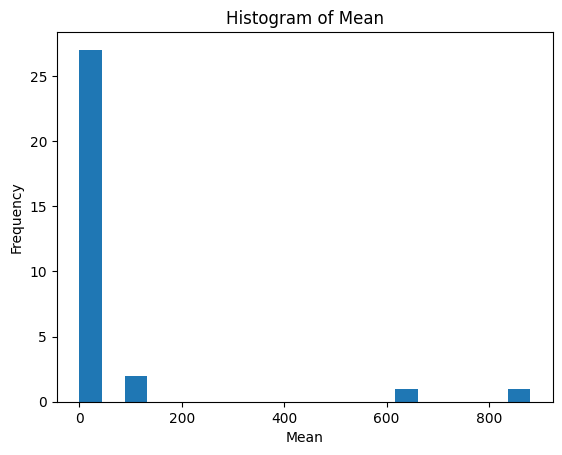

In [6]:
# prompt: Mediante el marco de datos univariate_analysis: histograma de main_radius

import matplotlib.pyplot as plt

# Assuming 'main_radius' is a column in your dataframe.
# Replace 'univariate_analysis' with your actual dataframe name if different.

# Create the histogram
plt.hist(univariate_analysis['Mean'], bins=20)  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Mean')

# Display the histogram
plt.show()


Solicito un gráfico de cajas de esta misma variable\
"gráfico de cajas de main_radius"

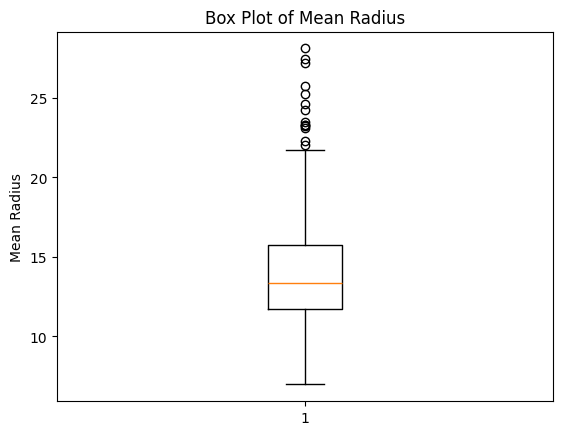

In [7]:
# prompt: gráfico de cajas de main_radius

import matplotlib.pyplot as plt

# Assuming 'main_radius' is a column in your dataframe 'df'.
# Replace 'df' with your actual dataframe name if different.

# Create the box plot
plt.boxplot(df['mean radius'])

# Add labels and title
plt.ylabel('Mean Radius')
plt.title('Box Plot of Mean Radius')

# Display the box plot
plt.show()

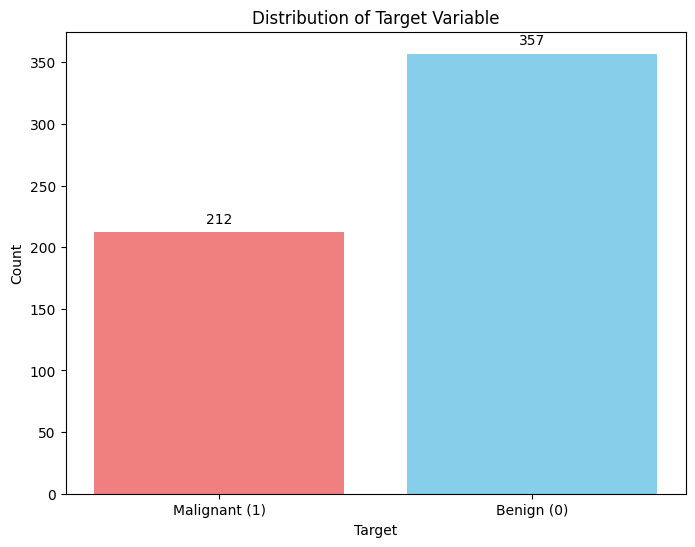

In [11]:
# prompt: muestra una gráfica de la variable "target" como categorica, indica un color para cada una e indica el número en la gráfica, indica la etiqueta

import matplotlib.pyplot as plt

# Count the occurrences of each target value
target_counts = df['target'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
bars = plt.bar(target_counts.index, target_counts.values, color=['skyblue', 'lightcoral'])

# Add labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom') # Adjust 5 for better positioning

# Customize the x-axis ticks (optional)
plt.xticks(target_counts.index, ['Benign (0)', 'Malignant (1)']) # Assuming 0 and 1 represent benign and malignant

# Display the plot
plt.show()

## Prueba tú mismo

Pasos:

1- Haz click en la parte superior derecha a "+ Código"\
2- haz click en "crear código"\
3- Escribe la orden que consideres.\
4- Ejecuta el código.\
5- Si no estás satisfecho, regenera la orden, añade detalles. Cuantos más detalels, mejor.\
6- Comparte tus resultados en el foro.